In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
 
from imblearn.over_sampling import SMOTE

c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

### Load and inspect dataset
train file: WINE.csv, test file TEST.csv

In [2]:
train_data = pd.read_csv('WINE.csv')
train_data.drop('Index', axis=1, inplace=True) #drop index column bacause it useless
train_data.sample(5)

,Target,Type,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
3846,4,white_wine,7.60,1.02,5.40,3.45,17.02,23.7,1.85,5.25,40.7,47.67,2.11,1.86,2.92,7.35,0.19
3608,4,white_wine,7.80,1.02,4.46,3.40,6.58,23.3,2.38,5.70,73.7,84.01,1.79,9.98,2.34,9.75,0.04
2531,5,white_wine,9.60,1.02,2.31,3.40,15.12,22.1,2.64,4.05,33.0,44.18,1.52,1.67,3.21,6.40,0.19
3838,4,red_wine,8.35,1.02,0.57,3.53,2.21,28.3,5.54,4.50,7.7,23.46,1.59,3.47,7.15,0.55,0.46
4681,4,red_wine,9.00,1.02,8.03,3.60,2.58,27.7,2.90,5.70,19.8,31.06,0.91,3.16,7.30,3.30,0.30


In [3]:
train_data.describe()

,Target,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.00000,5567.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5584.000000,5600.000000,5600.000000,5600.000000
mean,3.812143,8.337791,1.039718,5.250179,3.427979,5.59803,24.539752,3.421562,4.776455,32.608714,43.709220,1.366580,2.909697,4.544402,5.516623,0.145773
std,0.864077,0.591844,0.457331,3.698764,0.165377,4.54153,2.573420,2.155710,2.170485,19.532201,20.156748,0.349658,2.121635,2.174807,2.820828,0.094536
min,1.000000,7.100000,1.010000,0.000000,2.910000,0.97000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.850000,1.010000,2.740000,3.320000,2.11000,22.900000,1.980000,3.750000,17.600000,28.780000,1.130000,1.800000,3.070000,3.650000,0.070000
50%,4.000000,8.250000,1.020000,4.450000,3.420000,3.25000,24.100000,2.770000,4.650000,30.800000,41.695000,1.360000,2.360000,4.230000,5.650000,0.140000
75%,4.000000,8.750000,1.020000,6.860000,3.530000,8.19000,25.500000,4.220000,5.850000,45.100000,56.120000,1.600000,3.470000,5.550000,7.500000,0.210000
max,6.000000,10.550000,10.210000,30.720000,4.240000,62.91000,41.900000,16.500000,24.900000,316.800000,318.220000,2.600000,37.260000,25.990000,21.700000,0.520000


In [4]:
train_data.info()
# here I saw that there is some missing data in columns A and H, also column Type need to be encoded into numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 17 columns):
Target      5600 non-null int64
Type        5600 non-null object
Alcohol     5600 non-null float64
Density     5600 non-null float64
Nitrogen    5600 non-null float64
pH          5600 non-null float64
Sugar       5600 non-null float64
A           5567 non-null float64
B           5600 non-null float64
C           5600 non-null float64
D           5600 non-null float64
Di          5600 non-null float64
E           5600 non-null float64
H           5584 non-null float64
S           5600 non-null float64
U           5600 non-null float64
V           5600 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 743.9+ KB


count    5567.000000
mean       24.539752
std         2.573420
min        17.700000
25%        22.900000
50%        24.100000
75%        25.500000
max        41.900000
Name: A, dtype: float64


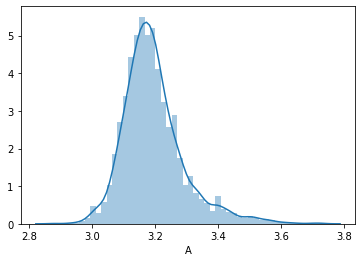

In [5]:
# handling non missing data in column A
print(train_data['A'].describe())
# distribusion is not normal so i will use log operation
train_data['A'] = np.log(train_data['A'])
train_data['A'].fillna(train_data['A'].mean(), inplace=True)

sns.distplot(train_data['A'].dropna())
plt.show()

count    5584.000000
mean        2.909697
std         2.121635
min         0.000000
25%         1.800000
50%         2.360000
75%         3.470000
max        37.260000
Name: H, dtype: float64


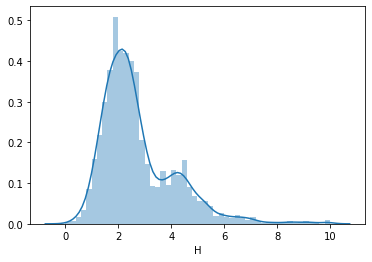

In [6]:
# handling non missing data in column H
print(train_data['H'].describe())
# here i can't do log transformation so i just insert mean values due to small difference between mean and median
train_data['H'].fillna(train_data['H'].mean(), inplace=True)
train_data = train_data.drop(train_data['H'][train_data['H'] > 10].index, axis=0)

sns.distplot(train_data['H'].dropna())
plt.show()

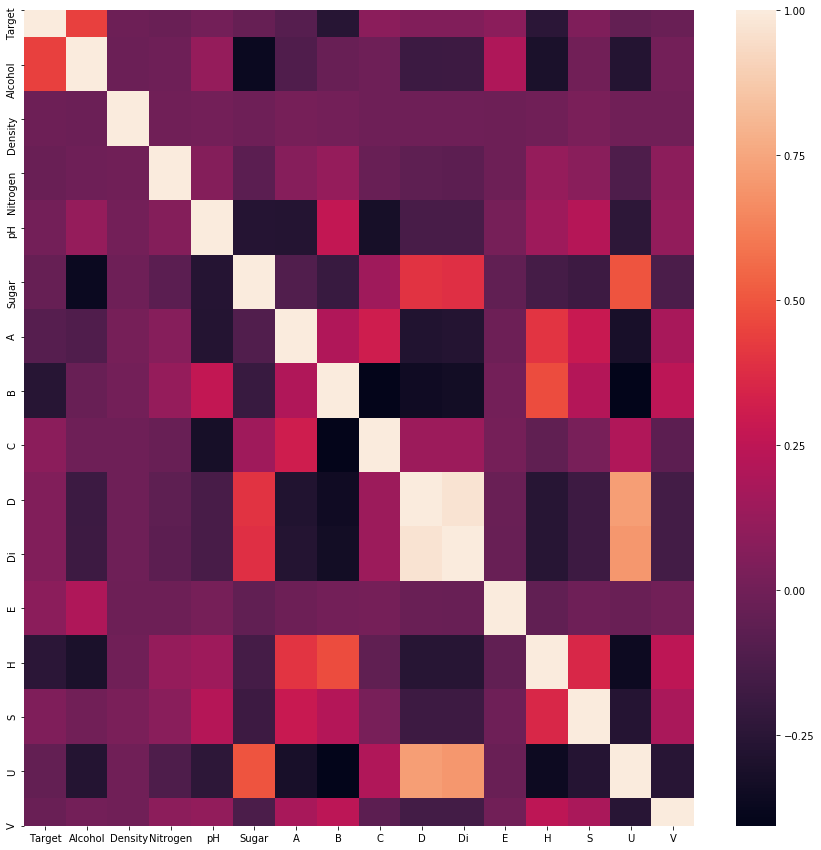

In [7]:
_ = plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr())
plt.show()

In [8]:
# now i will handle categorical data in our case i have category type = white_wine, red_whine
encoding_map = {'white_wine': 0, 'red_wine': 1}
train_data['Type'] = train_data['Type'].apply(lambda x: encoding_map.get(x))
print(train_data['Type'].sample(3))

4922    0
5068    0
3971    1
Name: Type, dtype: int64


In [9]:
# checking for class balance
print(train_data['Target'].value_counts())

4    2407
3    1824
5     930
2     180
6     158
1      22
Name: Target, dtype: int64


In [10]:
# divided data to x_data and y_data
x_data = train_data.drop(['Target'], axis=1)
y_data = train_data['Target']

print(x_data.shape, y_data.shape)

(5521, 16) (5521,)


In [11]:
# since classes in dataset are unbalanced I desided to use SMOTE technique for balancig dataset

smote = SMOTE('minority')
x_data_upsampled, y_data_upsampled = smote.fit_sample(x_data, y_data) # this is for '1' class
x_data_upsampled, y_data_upsampled = smote.fit_sample(x_data_upsampled, y_data_upsampled) # this is for '6' class
x_data_upsampled, y_data_upsampled = smote.fit_sample(x_data_upsampled, y_data_upsampled) # this is for '2' class
x_data_upsampled, y_data_upsampled = smote.fit_sample(x_data_upsampled, y_data_upsampled) # this is for '5' class
x_data_upsampled, y_data_upsampled = smote.fit_sample(x_data_upsampled, y_data_upsampled) # this is for '3' class

print(f'Train set shape after upsampling: {x_data_upsampled.shape}')

unique, counts = np.unique(y_data_upsampled, return_counts=True)
print(f'Classes distribution after upsampling {dict(zip(unique, counts))}')


Train set shape after upsampling: (14442, 16)
Classes distribution after upsampling {1: 2407, 2: 2407, 3: 2407, 4: 2407, 5: 2407, 6: 2407}


### Train 
In this case I have multi-label classification problem (0..6 Bad Wine...Good Wine). I decided to use such metrics as accuracy and F1 score. Accuracy will show the overall perfomance of the models and F1 score is the combination of two metrics (precision and recall) that are often used in classification tasks.

I will use such algorithms as **SVM** and **GradientBoosting**. For comparing I'll use the cross-validation technique.

In [12]:
# scaling data before training
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data_upsampled)

# split data into train-test sets
# train_x, test_x, train_y, test_y = train_test_split(x_data_upsampled, y_data_upsampled, test_size=0.1)
# print(train_x.shape, test_x.shape)

In [14]:
svc_params = {'C': 1., 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'tol': 0.001, 'class_weight': None}

svm_clf = SVC(**svc_params)
# svm_clf.fit(train_x, train_y)
scores = cross_val_score(svm_clf, x_data_upsampled, y_data_upsampled, cv=5, scoring='f1_macro')

print(f'Average score: {np.mean(scores)}, Median score: {np.median(scores)}, STD: {np.std(scores)}')

# cm = confusion_matrix(test_y, y_pred)
# sns.heatmap(cm, xticklabels=range(1, 7), yticklabels=range(1, 7))

Average score: 0.8249873202982696, Median score: 0.8250880915815735, STD: 0.022054340198004854


In [15]:
gb_params = {'loss': 'deviance', 'learning_rate': 0.1, 'n_estimators': 200,
             'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8, 'n_iter_no_change': 10}

gb_clf = GradientBoostingClassifier(**gb_params)
scores = cross_val_score(gb_clf, x_data_upsampled, y_data_upsampled, cv=5, scoring='f1_macro')

print(f'Average score: {np.mean(scores)}, Median score: {np.median(scores)}, STD: {np.std(scores)}')

# gb_clf.fit(train_x, train_y)
# y_pred = gb_clf.predict(test_x)

# print(f'Accuracy: {accuracy_score(test_y, y_pred)}')
# print('F1 score average == macro: {}'.format(f1_score(test_y, y_pred, average='macro')))

# cm = confusion_matrix(test_y, y_pred)

# sns.heatmap(cm, xticklabels=range(1, 7), yticklabels=range(1, 7))

Average score: 0.8549169284585474, Median score: 0.8701840472792796, STD: 0.020617953899947136


### Model selection and conclusion

So, the criterion for choosing a model is the value of the F1 score metric. The results show that the GradientBoosting model showed better performance, I can conclude that it will be used in production.

In [16]:
gb_clf = GradientBoostingClassifier(**gb_params)
gb_clf.fit(x_data_upsampled, y_data_upsampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=10, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
# do test.csv

test_data = pd.read_csv('TEST.csv')
index_data = test_data['Index'].values
test_data.drop('Index', axis=1, inplace=True)
test_data.sample(5)

,Type,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
756,white_wine,9.60,1.01,6.06,3.46,4.20,23.3,4.09,3.30,17.60,28.12,1.41,1.80,4.53,4.60,0.24
559,white_wine,8.00,1.01,2.69,3.63,3.82,20.7,1.58,4.65,23.10,29.55,1.01,1.67,4.09,4.25,0.23
749,red_wine,9.20,1.02,7.30,3.43,2.30,28.1,4.22,6.15,15.40,28.72,1.64,3.04,5.55,1.70,0.41
328,white_wine,7.95,1.02,3.45,3.36,6.38,21.7,2.90,1.35,38.50,47.09,1.40,2.05,3.80,6.60,0.09
399,white_wine,7.85,1.02,3.01,3.53,4.77,23.7,2.90,3.45,54.45,59.54,1.65,3.22,5.55,11.62,0.23


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 16 columns):
Type        790 non-null object
Alcohol     790 non-null float64
Density     790 non-null float64
Nitrogen    790 non-null float64
pH          790 non-null float64
Sugar       790 non-null float64
A           790 non-null float64
B           790 non-null float64
C           790 non-null float64
D           790 non-null float64
Di          790 non-null float64
E           790 non-null float64
H           790 non-null float64
S           790 non-null float64
U           790 non-null float64
V           790 non-null float64
dtypes: float64(15), object(1)
memory usage: 98.9+ KB


In [19]:
encoding_map = {'white_wine': 0, 'red_wine': 1}
test_data['Type'] = test_data['Type'].apply(lambda x: encoding_map.get(x))
print(test_data['Type'].sample(3))

474    0
412    0
283    1
Name: Type, dtype: int64


In [20]:
# predicting test data and saving submission.csv file

test_x = scaler.transform(test_data)
y_pred = gb_clf.predict(test_x)

data = {'Index': index_data, 'Target': y_pred}
submission_df = pd.DataFrame(data=data)
submission_df.to_csv('submission.csv', index=False)